<a href="https://colab.research.google.com/github/BhavanamHarshitha/FMML-LAB-1/blob/main/FMML_Module4_Lab1_2024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# FOUNDATIONS OF MODERN MACHINE LEARNING, IIIT Hyderabad
# Module 4: Perceptron and Gradient Descent
## Lab 1: Perceptron

In this lab, we will be studying the perceptron learning algorithm.



In [ ]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

First we need to define a labeled data set. Let's make a toy dataset.

In [ ]:
X = np.array([
    [-2, 4],
    [4, 1],
    [1, 6],
    [2, 4],
    [6, 2]
])

Next we need to add a bias term -1 into the data set.

In [ ]:
X = np.array([
    [-2, 4, -1],
    [4, 1, -1],
    [1, 6, -1],
    [2, 4, -1],
    [6, 2, -1],
])

In [ ]:
y = np.array([-1, -1, 1, 1, 1])

This small toy data set contains two samples labeled with −1 and three samples labeled with +1. This means we have a binary classification problem, as the data set contains two sample classes. Lets plot the dataset to see, that is is linearly seperable

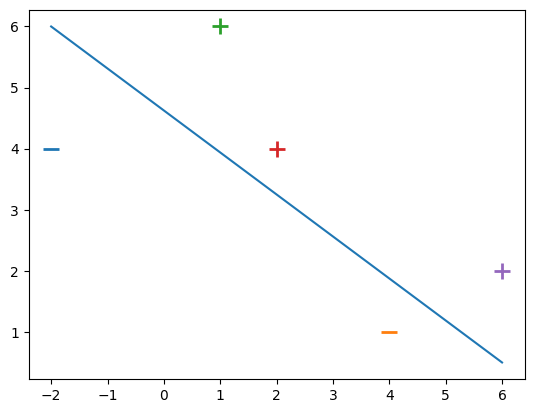

In [ ]:
for d, sample in enumerate(X):
    # Plot the negative samples
    if d < 2:
        plt.scatter(sample[0], sample[1], s=120, marker='_', linewidths=2)
    # Plot the positive samples
    else:
        plt.scatter(sample[0], sample[1], s=120, marker='+', linewidths=2)

# Print a possible hyperplane, that is seperating the two classes.
plt.plot([-2, 6], [6, 0.5])

Finally we can code our Perceptron algorithm using our update rule. To keep it simple, we will linearly loop over the sample set. For larger data sets it makes sence, to randomly pick a sample during each iteration in the for-loop.

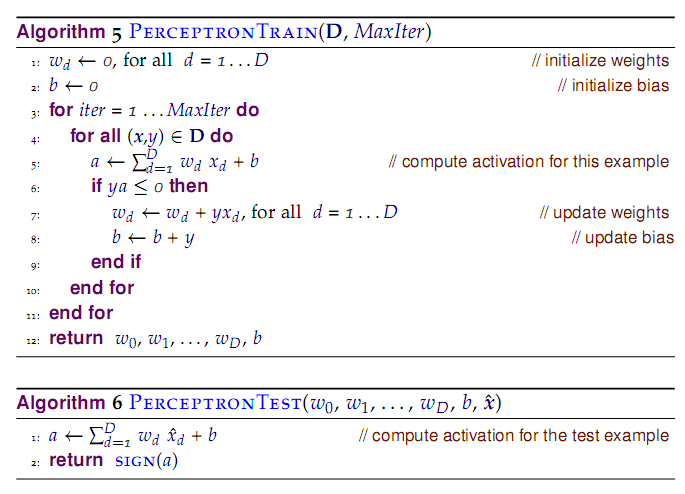

The algorithm is shown in the above image.

In [ ]:
def perceptron_algo(X, Y):
    w = np.zeros(len(X[0]))
    eta = 1
    epochs = 10

    for epoch in range(epochs):
        for i, x in enumerate(X):
            if (np.dot(X[i], w) * Y[i]) <= 0:
                w = w + eta * X[i] * Y[i]
    return w

In [ ]:
def perceptron_algo_plot(X, Y):
    '''
    train perceptron and plot the total loss in each epoch.

    :param X: data samples
    :param Y: data labels
    :return: weight vector as a numpy array
    '''
    w = np.zeros(len(X[0]))
    eta = 1
    n = 30
    errors = []

    for t in range(n):
        total_error = 0
        for i, x in enumerate(X):
            if (np.dot(X[i], w) * Y[i]) <= 0:
                total_error += (np.dot(X[i], w) * Y[i])
                w = w + eta * X[i] * Y[i]
        errors.append(total_error * -1)

    plt.plot(errors)
    plt.xlabel('Epoch')
    plt.ylabel('Total Loss')

    return w

Next, we will see the the training error at each epoch.

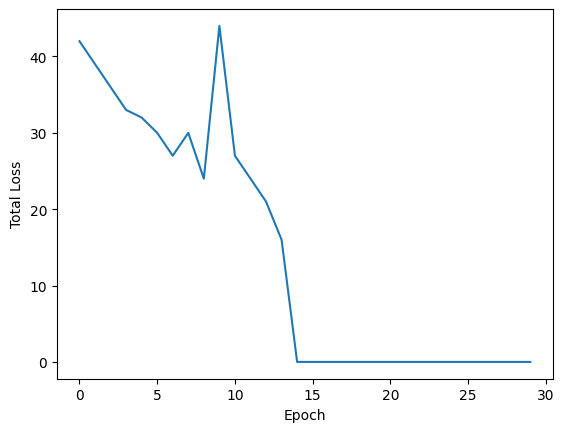

In [ ]:
w = perceptron_algo_plot(X, y)

We now plot the decision boundary and check which samples have been classified as positive and which samples have been classified as negative.

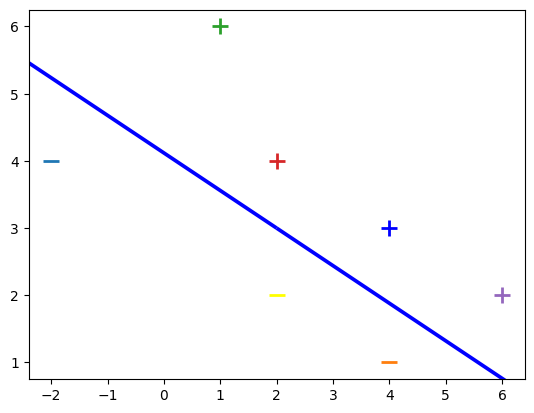

In [ ]:
for d, sample in enumerate(X):
    # Plot the negative samples
    if d < 2:
        plt.scatter(sample[0], sample[1], s=120, marker='_', linewidths=2)
    # Plot the positive samples
    else:
        plt.scatter(sample[0], sample[1], s=120, marker='+', linewidths=2)

# Add our test samples

plt.scatter(2, 2, s=120, marker='_', linewidths=2, color='yellow')
plt.scatter(4, 3, s=120, marker='+', linewidths=2, color='blue')

# Print the hyperplane calculated by perceptron_sgd()
x2 = [w[0], w[1], -w[1], w[0]]
x3 = [w[0], w[1], w[1], -w[0]]

x2x3 = np.array([x2, x3])
X, Y, U, V = zip(*x2x3)
ax = plt.gca()
ax.quiver(X, Y, U, V, scale=1, color='blue')

As you can see, our algorithm has correctly classified all the samples. The decision boundary is shown in blue.

# Things to try


1.   Try this on a real dataset like the Sonar dataset or the Banknote Dataset and show the error plot.
2.   Increase/decrease the learning rate to see how many iterations will be take to coverge. Does it even converge on a huge learning rate?
4. Take a toy dataset that is not linearly separable and run the perceptron algorithm on it. What happens? Note your observations. An example is given below.



/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


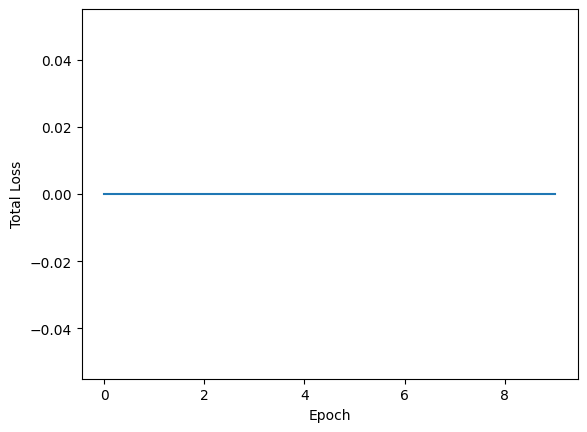

In [ ]:
#QUESTION 1 ANSWER#

import numpy as np
from sklearn.datasets import fetch_openml
from sklearn.preprocessing import LabelEncoder
from matplotlib import pyplot as plt

# Step 1: Load the Sonar dataset
sonar = fetch_openml(name='sonar', version=1)

# Encode target variable
label_encoder = LabelEncoder()
y_sonar = label_encoder.fit_transform(sonar.target)

# Step 2: Preprocess the data
X_sonar_bias = np.c_[sonar.data, -np.ones(sonar.data.shape[0])]

# Step 3: Perceptron algorithm
def perceptron_algo(X, Y):
    w = np.zeros(len(X[0]))
    eta = 1
    epochs = 10
    errors = []

    for epoch in range(epochs):
        total_error = 0
        for i, x in enumerate(X):
            if (np.dot(X[i], w) * Y[i]) <= 0:
                total_error += (np.dot(X[i], w) * Y[i])
                w = w + eta * X[i] * Y[i]
        errors.append(total_error * -1)

    plt.plot(errors)
    plt.xlabel('Epoch')
    plt.ylabel('Total Loss')

    return w

# Step 4: Apply the Perceptron algorithm
w_sonar = perceptron_algo(X_sonar_bias, y_sonar)

# Show the plot
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


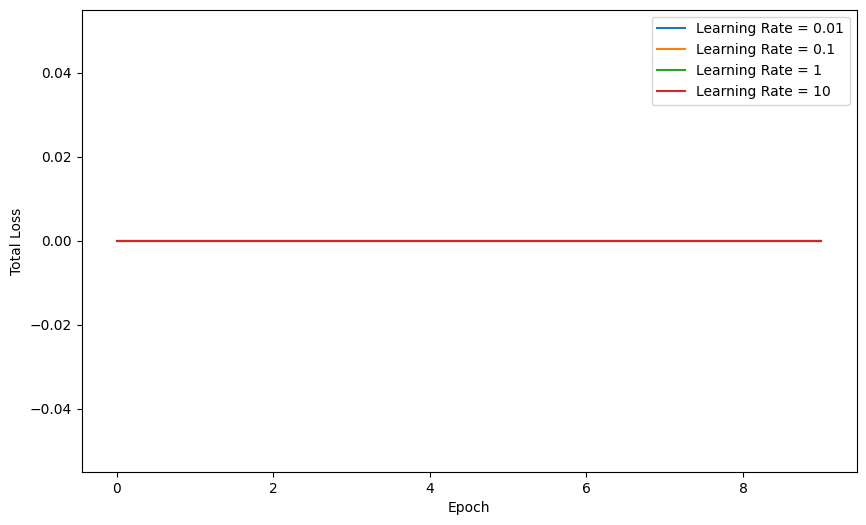

In [ ]:
#QUESTION 2 ANSWER#

import numpy as np
from sklearn.datasets import fetch_openml
from sklearn.preprocessing import LabelEncoder
from matplotlib import pyplot as plt

# Step 1: Load the Sonar dataset
sonar = fetch_openml(name='sonar', version=1)

# Encode target variable
label_encoder = LabelEncoder()
y_sonar = label_encoder.fit_transform(sonar.target)

# Step 2: Preprocess the data
X_sonar_bias = np.c_[sonar.data, -np.ones(sonar.data.shape[0])]

# Step 3: Perceptron algorithm
def perceptron_algo(X, Y, learning_rate):
    w = np.zeros(len(X[0]))
    epochs = 10
    errors = []

    for epoch in range(epochs):
        total_error = 0
        for i, x in enumerate(X):
            if (np.dot(X[i], w) * Y[i]) <= 0:
                total_error += (np.dot(X[i], w) * Y[i])
                w = w + learning_rate * X[i] * Y[i]
        errors.append(total_error * -1)

    plt.plot(errors, label=f'Learning Rate = {learning_rate}')
    plt.xlabel('Epoch')
    plt.ylabel('Total Loss')

    return w

# Step 4: Experiment with different learning rates
learning_rates = [0.01, 0.1, 1, 10]
plt.figure(figsize=(10, 6))

for lr in learning_rates:
    w_sonar = perceptron_algo(X_sonar_bias, y_sonar, learning_rate=lr)

plt.legend()
plt.show()

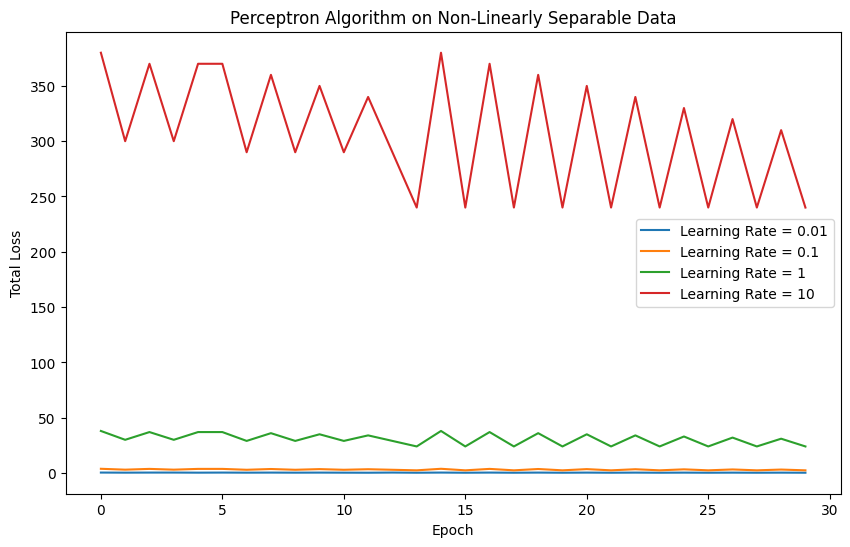

In [ ]:
#QUESTION 3 ANSWER#


import numpy as np
from matplotlib import pyplot as plt

# Non-linearly separable dataset
X_non_linear = np.array([
    [-2, 4, -1],
    [4, 1, -1],
    [1, 6, -1],
    [2, 4, -1],
    [6, 2, -1],
])
y_non_linear = np.array([-1, -1, 1, -1, -1])

# Perceptron algorithm
def perceptron_algo_non_linear(X, Y, learning_rate):
    w = np.zeros(len(X[0]))
    epochs = 30
    errors = []

    for epoch in range(epochs):
        total_error = 0
        for i, x in enumerate(X):
            if (np.dot(X[i], w) * Y[i]) <= 0:
                total_error += (np.dot(X[i], w) * Y[i])
                w = w + learning_rate * X[i] * Y[i]
        errors.append(total_error * -1)

    plt.plot(errors, label=f'Learning Rate = {learning_rate}')
    plt.xlabel('Epoch')
    plt.ylabel('Total Loss')

    return w

# Experiment with different learning rates
learning_rates = [0.01, 0.1, 1, 10]
plt.figure(figsize=(10, 6))

for lr in learning_rates:
    w_non_linear = perceptron_algo_non_linear(X_non_linear, y_non_linear, learning_rate=lr)

plt.legend()
plt.title('Perceptron Algorithm on Non-Linearly Separable Data')
plt.show()


In [ ]:
X = np.array([
    [-2, 4, -1],
    [4, 1, -1],
    [1, 6, -1],
    [2, 4, -1],
    [6, 2, -1],
])

In [ ]:
y = np.array([-1, -1, 1, -1, -1])

[-2.  3. 15.]


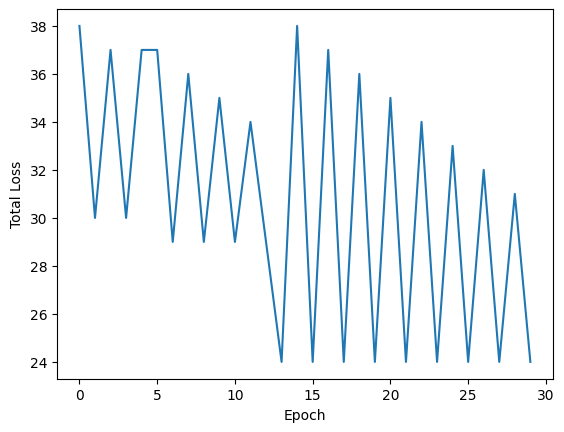

In [ ]:
print(perceptron_algo_plot(X, y))

If the training data is not Linearly Separable, the perceptron algorithm will eventually repeat the same set of weights and thereby enter an infinite loop.